# Exploratory Data Analysis (EDA): Reddit Posts on Medicare and Medicaid

## Overview
This notebook conducts exploratory data analysis (EDA) on a corpus of Reddit posts related to Medicare and Medicaid. The dataset includes post-level text and metadata collected from the following subreddits:
- r/Medicare  
- r/Medicaid  
- r/HealthInsurance  

The purpose of this notebook is to understand the structure, composition, and basic characteristics of the data prior to text preprocessing and clustering analysis.

---

## Analytical Goals
The EDA focuses on:
- Describing the distribution of posts across subreddits and over time
- Examining engagement metrics such as post scores and number of comments
- Summarizing text characteristics (word counts, common terms)
- Identifying broad patterns that inform downstream preprocessing and modeling choices

This notebook is intentionally descriptive and does **not** include clustering or vectorization methods.

---

## Data Description
The input dataset (`cleaned_text_data.csv`) contains one row per Reddit post and includes:
- Post metadata (subreddit, score, number of comments, timestamp)
- Raw text fields (title and post body)
- Basic text-derived features (character length, word count)
- A cleaned text field used only for exploratory summaries

---

## Reproducibility Notes
- This notebook assumes the dataset has already been generated using the Reddit API notebook
- Figures are **not** saved here since these are simply to familiarize with data. Clean and polished figures are produced in subsequent notebooks. 
- Text preprocessing here is **EDA-specific** and intentionally simpler than the preprocessing used for clustering

Downstream preprocessing and modeling are handled in separate notebooks.


## Imports and Global Settings

In [1]:
# Import statements
import os
import re
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords


In [2]:
# Global plotting style
sns.set_style("whitegrid")
sns.set_context("talk")

In [3]:
# Download once (safe if already present)
nltk.download("stopwords", quiet=True)
STOP_WORDS = set(stopwords.words("english"))


## Load data

In [4]:
df = pd.read_csv("../data/raw_reddit_data.csv")

print(f"Number of posts: {len(df):,}")
print(df.columns.tolist())

Number of posts: 1,665
['id', 'title', 'text', 'subreddit', 'score', 'num_comments', 'url', 'created_utc', 'date', 'text_length', 'word_count']


In [5]:
# Date handling
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")


## Basic metadata

In [6]:
print("\n--- Subreddit distribution (%) ---")
print(df["subreddit"].value_counts(normalize=True).mul(100).round(2))

print("\n--- Engagement summary ---")
print(df[["score", "num_comments"]].describe())



--- Subreddit distribution (%) ---
subreddit
medicaid           49.61
medicare           43.06
healthinsurance     7.33
Name: proportion, dtype: float64

--- Engagement summary ---
             score  num_comments
count  1665.000000   1665.000000
mean      6.971772     14.935135
std      55.587086     24.532761
min       0.000000      0.000000
25%       1.000000      3.000000
50%       2.000000      7.000000
75%       5.000000     17.000000
max    2104.000000    366.000000


## Basic Text Preprocessing (for EDA only) 

This is simpler than what will be used for TF-IDF later. 

In [7]:
# Basic tokenization function 
def tokenize_for_eda(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = [t for t in text.split() if t not in STOP_WORDS]
    return tokens


In [8]:
# Apply functions to dataframe
df["full_text"] = df["title"].fillna("") + " " + df["text"].fillna("")
df["tokens"] = df["full_text"].apply(tokenize_for_eda)
df["num_words"] = df["tokens"].apply(len)

## Word Frequency 

In [9]:
# Calculate word counts
all_tokens = df["tokens"].sum()
word_counts = Counter(all_tokens)

most_common_words = word_counts.most_common(20)

In [10]:
# Print most common words
print("\n--- 20 Most Common Words ---")
for word, count in most_common_words:
    print(f"{word}: {count}")



--- 20 Most Common Words ---
medicaid: 2527
medicare: 2018
im: 1488
plan: 1381
insurance: 1166
get: 1020
would: 908
income: 848
part: 822
year: 767
dont: 644
coverage: 606
health: 592
know: 591
pay: 574
need: 548
month: 543
one: 502
help: 486
like: 480


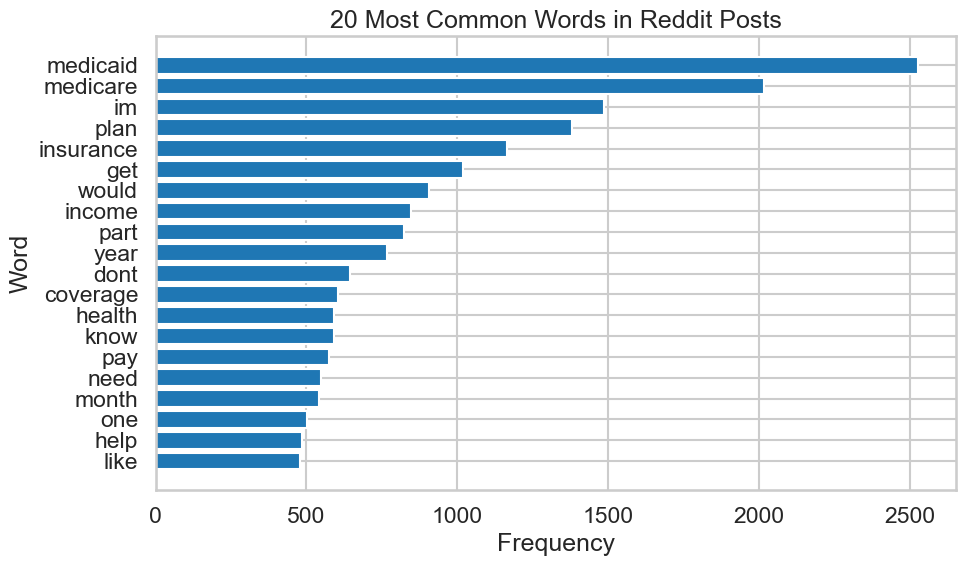

In [11]:
# Horizontal bar plot of most common words 
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.barh(words[::-1], counts[::-1])
plt.title("20 Most Common Words in Reddit Posts")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


## Engagement

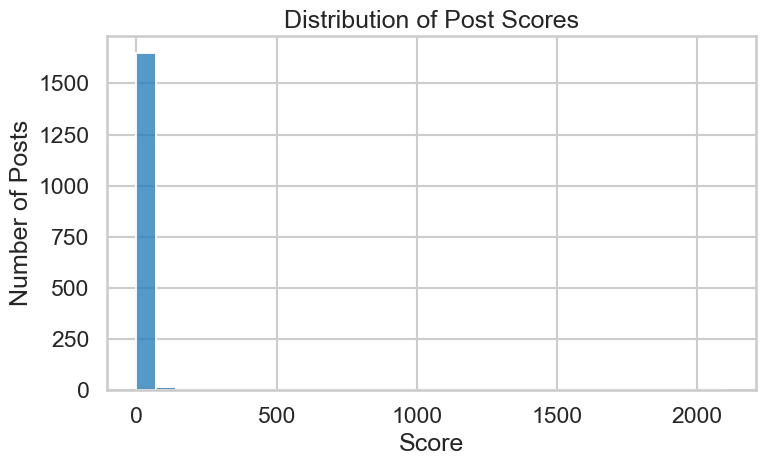

In [12]:
# Post Scores
plt.figure(figsize=(8, 5))
sns.histplot(df["score"], bins=30)
plt.title("Distribution of Post Scores")
plt.xlabel("Score")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()

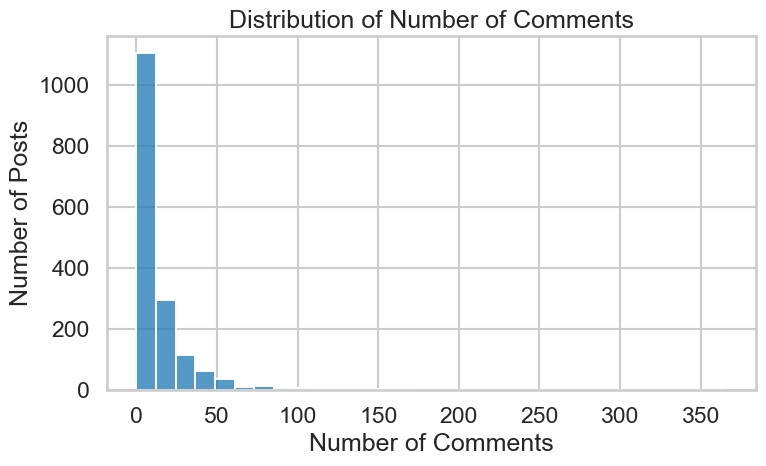

In [13]:
# Number of comments
plt.figure(figsize=(8, 5))
sns.histplot(df["num_comments"], bins=30)
plt.title("Distribution of Number of Comments")
plt.xlabel("Number of Comments")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


## Subreddit Composition

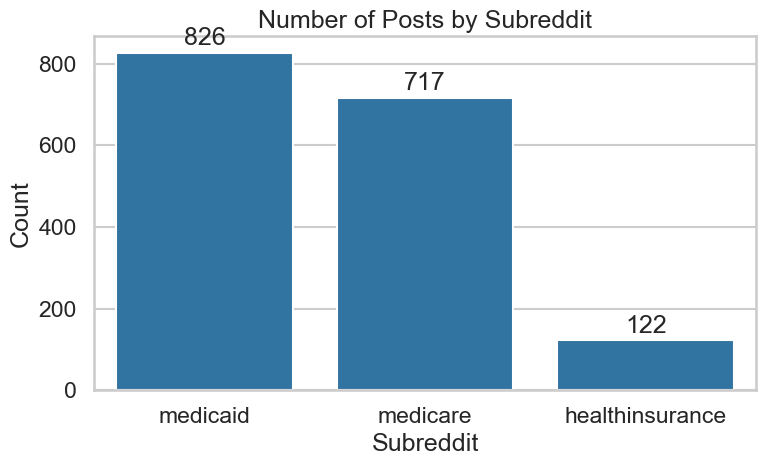

In [14]:
# Number of posts by Subreddit
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df,
    x="subreddit",
    order=df["subreddit"].value_counts().index
)

plt.title("Number of Posts by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Count")

for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=2)

plt.tight_layout()
plt.show()


## Time trends

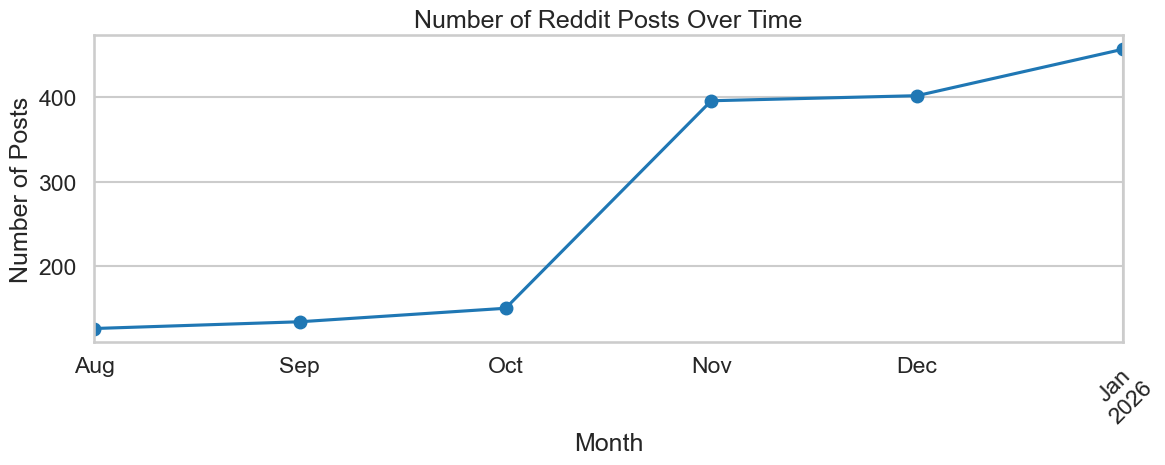

In [15]:
# Monthly plot
monthly_counts = df.groupby("month").size()

plt.figure(figsize=(12, 5))
monthly_counts.plot(marker="o")
plt.title("Number of Reddit Posts Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Word Count Distributions

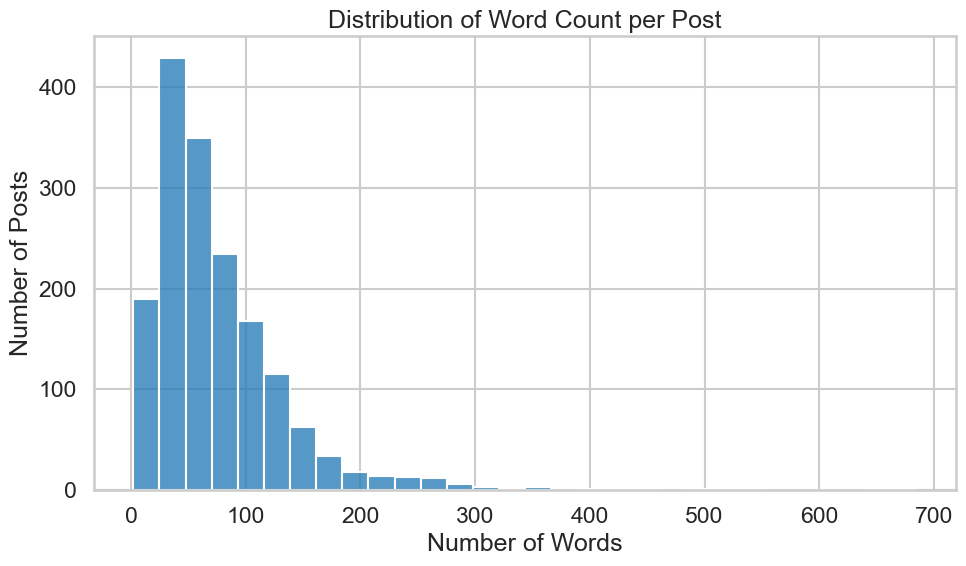

In [16]:
# Word count per post 
plt.figure(figsize=(10, 6))
sns.histplot(df["num_words"], bins=30)
plt.title("Distribution of Word Count per Post")
plt.xlabel("Number of Words")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()
